<a href="https://colab.research.google.com/github/Freddy-94/GeneticAlgorithms/blob/main/GeneticAlgorithmsv_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alfredo Bernal Luna
### Practice No. 3. Genetic Algorithms.

# Modules to be used in this program:

In [ ]:
import numpy as np
from numpy import sqrt, cos, e, pi, exp # for Ackley's function plot
import math
import random
import itertools
from decimal import Decimal
import matplotlib.pyplot as plt  # to plot

# Definition of cost functions:

1. Parabola.

   Let $f : {[-5.12, 5.12]} ^n \to \mathbb{R}$ given by:

  \begin{align}
          f(\mathbf{x}) = \sum_{i=1}^n x_{i}^{2} 
  \end{align}

2. Rosenbrock's function.

   Let $f : {[-2.048, 2.048]} ^n \to \mathbb{R}$ given by:

  \begin{align}
          f(\mathbf{x}) = \sum_{i=1}^n 100 (x_{i}^{2} - x_{i+1})^{2} + (1 - x_{i})^{2}
  \end{align}

3. Ackley's function.

   Let $f : {[-32.768, 32.768]} ^n \to \mathbb{R}$ given by:

  \begin{align}
          f(\mathbf{x}) = -20\mathrm{e}^{-0.2\sqrt{1/n\sum_{i=1}^n x_{i}^{2}}} - \mathrm{e}^{1/n\sum_{i=1}^n \cos {2\pi x_{i}}} + 20 + \mathrm{e}
  \end{align}

In [ ]:
def parabola(n, x):
    """
    REQUIRES: An integer n that represents the dimension of the domain of the function and a numpy array 
              representing the input vector in R^n.
    EFFECTS: Returns the value after evaluating the parabola function of the definition above.
    """  
    parabola_value = 0
    for i in range(0, n):
        parabola_value += x[i]**2
    return parabola_value

def rosenbrock(n, x):
    """
    REQUIRES: An integer n that represents the dimension of the domain of the function and a numpy array 
              representing the input vector in R^n.
    EFFECTS: Returns the value after evaluating the Rosenbrock's function of the definition above.
    """   
    sum = 0
    for i in range(0, n-1):
        sum += ((100 * (x[i]**2 - x[i+1])**2) + (1 - x[i])**2)
    rosenbrock_value = sum
    return rosenbrock_value

def ackley(n, x):
    """
    REQUIRES: An integer n that represents the dimension of the domain of the function and a numpy array 
              representing the input vector in R^n.
    EFFECTS: Returns the value after evaluating the Ackley's function of the definition above.
    """    
    gen_cos_avg = 0
    root_mean_square = 0
    for i in range(0, n):
        gen_cos_avg += cos(2*pi*x[i])
        root_mean_square += x[i]**2
    root_mean_square = sqrt((1/n)*(root_mean_square))         
    ackley = -20*exp((-0.2)*(root_mean_square)) - exp(gen_cos_avg) +  20 + e
    return ackley

# Test of the cost functions (dimension = 10):

**1.   Parabola:**

In [ ]:
parabola(10, [3.1315, 2.6548, 1.265, 0.264, 0.00156, 2.165, 3.125, 2.568, 1.698, 1.145])

43.765881723599996

**2. Rosenbrock:**

In [ ]:
rosenbrock(10, [1.0261, -1.6548, -1.265, 0.264, 0.00156, -2.0165, -0.1235, 2.0326, 1.698, 1.145])

6003.8176985519785

**3. Ackley:**

In [ ]:
ackley(10, [31.0261, -31.6548, -21.265, 20.264, 10.00156, -20.0165, -30.1235, 20.0326, 10.698, 10.145])

-45.61924996821731

# Graphs of cost functions, in 3D:

In [ ]:
def plot_cost_function_3d(vars_domain, num_points_to_plot, cost_fun):
    """
    Function to plot the graphs of the cost functions, in 3 dimensions. This function might be 
    useful to gain more intuition on the problem at hand.
    REQUIRES: A list of float values representing the common interval of the two variables (in R^2), 
              the number of points we want to consider to plot the function, and the name of the 
              cost function we want to plot. 
    EFFECTS: Create a plot of the cost_fun.
    """
    x1 = np.linspace(vars_domain[0], vars_domain[1], num_points_to_plot)
    x2 = x1
    coord_array_x1, coord_array_x2 = np.meshgrid(x1, x2)
    cost = cost_fun(2, [coord_array_x1, coord_array_x2]) 
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.plot_surface(coord_array_x1, coord_array_x2, cost, rstride = 1, cstride = 1,
                    cmap = 'viridis', edgecolor = 'none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

**1.   Parabola:** 

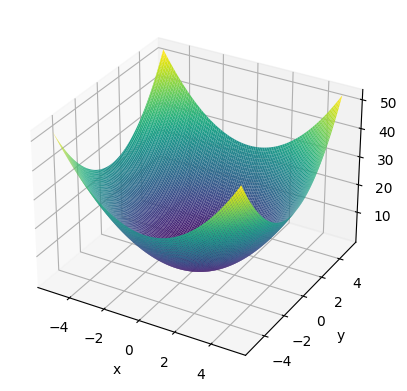

In [ ]:
plot_cost_function_3d([-5.12, 5.12], 100, parabola)

**2. Rosenbrock:** 

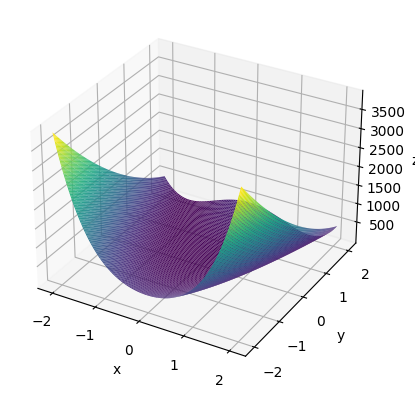

In [ ]:
plot_cost_function_3d([-2.048, 2.048], 100, rosenbrock)

**3. Ackley:**

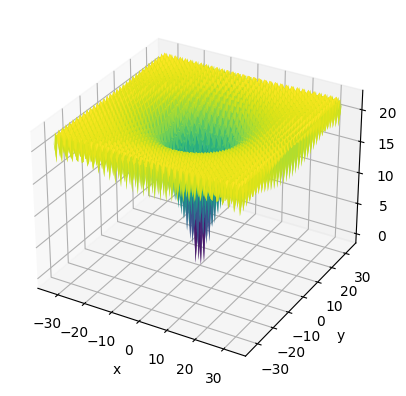

In [ ]:
plot_cost_function_3d([-32.768, 32.768], 100, ackley)

# Binary encoding (decoding) of variables of cost functions.

## Decimal to binary representation:

## 1. Size of bits needed to do the conversion:

In [ ]:
def bit_size_binary(lim_inf, lim_sup, precision):
    """
    Function to obtain the number of bits needed in order to convert from decimal representation
    to binary.
    REQUIRES: Two float numbers, representing correspondingly to the liminf and the limsup of 
              an interval: [liminf, limsup], and the precision of the float number we want to 
              encode in binary.
    EFFECTS: Returns the number of bits needed in order to do the encoding of a float number, to 
             binary.
    """
    bit_size = math.log((10**precision) * (lim_sup - lim_inf), 2)
    return math.ceil(bit_size)

### Example of how many bits we'll need for our problems defined above, with a precision of 4 decimal digits:

####1. For the parabola function defined above, we'll need 17 bits:

In [ ]:
bit_size_binary(-5.12, 5.12, 4)

17

####2. For the Rosenbrock function defined above, we'll need 16 bits:

In [ ]:
bit_size_binary(-2.048, 2.048, 4)

16

####3. For the Ackley function defined above, we'll need 20 bits:

In [ ]:
bit_size_binary(-32.768, 32.768, 4)

20

##2. Conversion from decimal to binary:

In [ ]:
def float_encode(float_vector, lim_inf, lim_sup, precision):
    """
    REQUIRES: A list of float numbers (representing a vector in R^n), two float numbers, representing 
              correspondingly to the liminf and the limsup of an interval: [liminf, limsup], and the
              precision of the float number we want to encode in binary.
    EFFECTS: Returns a list of binary string values, representing the corresponding binary representation
             of each one of the elements that compose the input vector.
    """
    bits_size = bit_size_binary(lim_inf, lim_sup, precision)
    binary = []
    for i in range(len(float_vector)):
        binary.append(format(int(round((float_vector[i] - lim_inf)*(10**precision))),'0' + str(bits_size) + 'b'))
    return binary

### Test of float encoding function for vectors in $\mathbb{R}^{3}$, for above cost functions defined in its corresponding domain, with a precision of 4 decimal digits. Note that we can give to the function any dimension of $\mathbb{R}^{n}$, along with any precision we wish.

####1. For the parabola function defined above:

In [ ]:
float_encode([-3.1410, 3.1410, 2.2715], -5.12, 5.12, 4)

['00100110101001110', '10100001010110010', '10010000010111011']

####2. For the Rosenbrock's function defined above:

In [ ]:
float_encode([-1.1410, 0.1410, 2.0215], -2.048, 2.048, 4)

['0010001101101110', '0101010110000010', '1001111011110111']

####3. For the Ackley's function defined above:

In [ ]:
float_encode([-30.1410, 20.1410, 15.0215], -32.768, 32.768, 4)

['00000110011010011110', '10000001001011000010', '01110100101011000111']

## Binary to decimal representation:

In [ ]:
def bin_decoding(bin_vector, lim_sup, precision):
    """
    Binary decoding function for a given bin_vector, and a given precision.
    As per above implementations, we are considering vectors that share the same
    domain, for each one of its variables; i.e., the input vector can take values
    in a domain of the form:  [a, b] x [a, b] x ... x [a, b].
    This is the same as the functions that our current program can handle.
    REQUIRES: A list of binary strings, where each string represents a binary representation 
              of a decimal value in the interval [a, b]. E.g. ['00100110101001110', '10100001010110010', '10010000010111011'], 
              the lim_sup of our interval (following our form above, it will be b, a float number), and the decimal precision that our numbers
              must have (an integer number).
    EFFECTS: Creates a vector in decimal representation, with the given precision.
    """
    dec_vect = []
    for bin_repr in bin_vector:
        bin_repr = bin_repr[::-1] # reverse current binary representation
        dec_repr = 0
        for i in range(len(bin_repr)):
            if bin_repr[i] == '1':
                dec_repr += 2**i
        dec_repr = round((dec_repr/(10**precision))-lim_sup, precision+1)
        dec_vect.append(dec_repr)
    return dec_vect

### Test of binary decoding function for a vector in $\mathbb{R}^{3}$. Notice we need to provide the limsup of each one of the variables. In our particular solution, we are assuming that all of the variables are in the same interval \[a, b].

####1. For the binary vector defined in encoding of parabola above:

In [ ]:
bin_decoding(['00100110101001110', '10100001010110010', '10010000010111011'], 5.12,  4)

[-3.141, 3.141, 2.2715]

####2. For the binary vector defined in encoding of Rosenbrock's function above:

In [ ]:
bin_decoding(['0010001101101110', '0101010110000010', '1001111011110111'], 2.048,  4)

[-1.141, 0.141, 2.0215]

####3. For the binary vector defined in encoding of Ackley's function above:

In [ ]:
bin_decoding(['00000110011010011110', '10000001001011000010', '01110100101011000111'], 32.768,  4)

[-30.141, 20.141, 15.0215]

# Cross-over Classes to implement different types of cross-over operators. Particularly, in this program we're considering only two. Namely, two cross-over and uniform cross-over operators:

In [ ]:
class TwoCrossover:
    def __init__(self, parent1, parent2):
        self.parent1 = parent1
        self.parent2 = parent2

    def crossover(self, cut_point1, cut_point2):
        """
        Implementation of the two crossover operator
        """
        children = []
        child1 = self.parent1[:cut_point1] + self.parent2[cut_point1:cut_point2] + self.parent1[cut_point2:]
        children.append(child1)
        child2 = self.parent2[:cut_point1] + self.parent1[cut_point1:cut_point2] + self.parent2[cut_point2:]
        children.append(child2)
        return children    

class UniformCrossover:
    def __init__(self, parent1, parent2):
        self.parent1 = parent1
        self.parent2 = parent2

    def crossover(self, cross_perc):
        """
        Implementation of the uniform crossover operator
        prob_vect is a probability vector generated by np.random.rand(n),
        where n is the length of the parents
        """
        prob_vect = np.random.rand(len(self.parent1))
        for i in range(len(prob_vect)):
            # print(prob_vect[i]) to validate that the unifor crossover operation is implemented correctly
            if prob_vect[i] < cross_perc:
                self.parent1[i], self.parent2[i] = self.parent2[i], self.parent1[i]
        return [self.parent1, self.parent2]

# Mutation operator:

In [ ]:
def mutation(chromosome, delta, mut_perc):
    """
    Implementation of the mutation operator.
    REQUIRES: A list of float values (or chromosome), representing the a vector in R^n in decimal representation that will be mutated,
              a float value delta (usually small), to alter the chromosome, and the percentage of mutation.
    EFFECTS:  Provides a new "chromosome" that is mutated, given the stochastic procedure.
    """
    new_chrom = []
    for gen in chromosome:
        if random.uniform(0,1) <= mut_perc:
            if random.uniform(0,1) <= 0.5:
                gen += delta
            else:
                gen -= delta
        new_chrom.append(gen)
    return new_chrom

### Test of mutation operator, with a delta of 0.73 and percentage of mutation of 0.25

In [ ]:
mutation([-30.141, 20.141, 15.0215], 0.73, 0.25)

[-29.410999999999998, 20.141, 15.0215]

# Genetic algorithm implementation.

## Random initial population:

In [ ]:
def initial_population(population_size, vars_domain, dim, precision): 
    """
    This function creates the initial random population to start the algorithm.
    population_size must be an even number, in order to create the tournament. See below 
    bin_tournament function.
    REQUIRES: An integer n that will represent the lenght of the output list, a list having two float values
              (representing the domain of the variables), another integer m representing the dimension of the vectors, 
              and anothe integer p representing the number of decimal values that our vectors will have.
    EFFECTS: Creates a list of lists having random float values allowed in the vars domain (the initial "population")
    """    
    population = []
    for i in range(0, population_size):
        individual = []    
        for i in range(0, dim):
            individual.append(round(random.uniform(vars_domain[0], vars_domain[1]), precision))
        population.append(individual)
    return population

## Test random initial population (20 individuals for parabola cost function, in dim = 10, with precision of two decimal digits):

In [ ]:
population = initial_population(20, [-5.12, 5.12], 10, 2)
population

[[3.13, -4.59, 3.93, -1.24, 4.74, 2.3, -4.26, -5.1, -1.07, -2.07],
 [0.63, 3.99, -4.67, 2.16, -1.46, 4.3, -2.65, -0.39, 0.03, 4.67],
 [-2.55, 2.31, 4.08, 1.74, -3.86, 1.1, -4.88, -3.67, 2.88, 3.96],
 [-2.0, -2.03, -3.49, -2.2, 0.41, -4.56, 2.84, -0.0, 5.07, -3.94],
 [-3.84, -1.07, -3.15, 1.37, -1.54, -3.1, -4.8, -3.91, 0.29, -4.01],
 [-3.91, 3.04, 3.06, 4.38, -0.23, -0.18, 0.79, -3.59, -1.1, -5.11],
 [2.73, 3.34, 1.83, -1.37, 2.32, -1.77, 3.68, -1.46, 1.46, -2.12],
 [2.9, -2.19, -0.28, 2.19, 4.2, -2.95, -2.77, -4.56, -0.23, 2.52],
 [4.94, -2.11, 3.76, 2.09, 4.24, 1.64, -1.93, -1.09, 0.93, 3.65],
 [0.42, -4.54, 1.62, -4.24, 3.75, 4.78, -2.01, -3.34, -4.97, -1.49],
 [-2.79, 2.2, -4.1, 2.82, -0.47, 3.17, -1.98, -4.41, 4.29, 4.13],
 [-2.29, -4.8, 3.05, 4.59, 3.84, -1.9, -1.14, 1.29, -4.96, -4.27],
 [2.65, 2.27, -1.62, -3.2, 0.55, -2.92, 1.63, -1.6, -0.62, 1.54],
 [-0.72, 1.84, -3.2, -3.35, -3.26, 4.58, 2.13, 2.41, 5.08, -2.16],
 [0.08, 1.15, 5.1, -2.39, 4.03, -3.33, 0.54, 4.62, 2.69, 3.36]

## Table of individuals, with their corresponding apptitudes (evaluation of cost function). 

In [ ]:
def table_pop_fitnesss(population, cost_fun):
    """
    This function provides a list of lists, showing the initial population, along its 
    corresponding aptitudes (their corresponding values that are obtained after evaluating
    the given cost function)
    """
    table = []
    for individual in population:
        table += [[individual, cost_fun(len(individual), individual)]]
    return table

### Test for the table of individuals, with their corresponding apptitudes (parabola cost function). Notice we are testing with the above random population obtained. 

In [ ]:
fitness_table = table_pop_fitnesss(population, parabola)
fitness_table

[[[3.13, -4.59, 3.93, -1.24, 4.74, 2.3, -4.26, -5.1, -1.07, -2.07], 125.1925],
 [[0.63, 3.99, -4.67, 2.16, -1.46, 4.3, -2.65, -0.39, 0.03, 4.67], 92.3975],
 [[-2.55, 2.31, 4.08, 1.74, -3.86, 1.1, -4.88, -3.67, 2.88, 3.96], 108.8815],
 [[-2.0, -2.03, -3.49, -2.2, 0.41, -4.56, 2.84, -0.0, 5.07, -3.94], 95.3968],
 [[-3.84, -1.07, -3.15, 1.37, -1.54, -3.1, -4.8, -3.91, 0.29, -4.01],
  94.16380000000001],
 [[-3.91, 3.04, 3.06, 4.38, -0.23, -0.18, 0.79, -3.59, -1.1, -5.11], 93.9973],
 [[2.73, 3.34, 1.83, -1.37, 2.32, -1.77, 3.68, -1.46, 1.46, -2.12], 54.6496],
 [[2.9, -2.19, -0.28, 2.19, 4.2, -2.95, -2.77, -4.56, -0.23, 2.52], 79.2929],
 [[4.94, -2.11, 3.76, 2.09, 4.24, 1.64, -1.93, -1.09, 0.93, 3.65],
  87.12900000000002],
 [[0.42, -4.54, 1.62, -4.24, 3.75, 4.78, -2.01, -3.34, -4.97, -1.49],
  120.4176],
 [[-2.79, 2.2, -4.1, 2.82, -0.47, 3.17, -1.98, -4.41, 4.29, 4.13], 106.4858],
 [[-2.29, -4.8, 3.05, 4.59, 3.84, -1.9, -1.14, 1.29, -4.96, -4.27], 122.8085],
 [[2.65, 2.27, -1.62, -3.2, 0.55

## Stochastic reminder parents selection without replacement.

In [ ]:
def stoch_rem_par_sel(table_pop_fitness):
    """
    Stochastic reminder parents selection without replacement implementation
    Notice this function has already the individuals (in decimal representation),
    along with its corresponding aptitudes (values output by the cost function)
    """
    total_fitness = 0
    exp_val_vector = [] # expected value vector that will have the expected values for each of the individuals of the population
    for i in range(len(table_pop_fitness)):
        total_fitness += table_pop_fitness[i][1]
        exp_val_vector.append(table_pop_fitness[i][1])
    avg_fitness = total_fitness/len(table_pop_fitness)
    exp_val_vector = np.array(exp_val_vector) # converted to a numpy array to perform division easier
    exp_val_vector = exp_val_vector/avg_fitness
    exp_val_vector = exp_val_vector.tolist()  # convert again to a list
    dec_exp_val_vector = [] # Vector that will contain the decimal part of the expected values
    parents = [] # Vector that will have the selected parents to reproduce
    for exp_val in exp_val_vector:
        exp_val_dec = round(exp_val % 1, 2) # decimal part of the expected values, with a precision of 2 decimal values
        dec_exp_val_vector.append(exp_val_dec)
        exp_val_int = int(exp_val) # integer part of each expected value
        if exp_val_int > 0:
            parents += [table_pop_fitness[exp_val_vector.index(exp_val)]] * exp_val_int   # posicion (index) in table pop fitness is the same as the expected values vector 
    for dec_exp_val in dec_exp_val_vector:
        flip = random.uniform(0,1)
        if flip < dec_exp_val: # and table_pop_fitness[dec_exp_val_vector.index(dec_exp_val)] not in parents: Notice we are allowing to repeat parents also by this flip
            parents.append(table_pop_fitness[dec_exp_val_vector.index(dec_exp_val)])     # posicion (index) in table pop fitness is the same as the dec_exp_val_vector values vector        
    return parents

### Test of the parents selection strategy by stochastic reminder without replacement. Notice we are using our above fitness table.

In [ ]:
parents_selected = stoch_rem_par_sel(fitness_table)
print(f"The number of parents selected by the stochastic reminder strategy is of: {len(parents_selected)}\n")
parents_selected

The number of parents selected by the stochastic reminder strategy is of: 21



[[[3.13, -4.59, 3.93, -1.24, 4.74, 2.3, -4.26, -5.1, -1.07, -2.07], 125.1925],
 [[-2.55, 2.31, 4.08, 1.74, -3.86, 1.1, -4.88, -3.67, 2.88, 3.96], 108.8815],
 [[0.42, -4.54, 1.62, -4.24, 3.75, 4.78, -2.01, -3.34, -4.97, -1.49],
  120.4176],
 [[-2.79, 2.2, -4.1, 2.82, -0.47, 3.17, -1.98, -4.41, 4.29, 4.13], 106.4858],
 [[-2.29, -4.8, 3.05, 4.59, 3.84, -1.9, -1.14, 1.29, -4.96, -4.27], 122.8085],
 [[0.08, 1.15, 5.1, -2.39, 4.03, -3.33, 0.54, 4.62, 2.69, 3.36], 100.5425],
 [[5.07, -0.2, -4.78, -1.06, 4.96, -4.39, -2.46, -5.08, -1.64, -5.08],
  153.94459999999998],
 [[-0.15, -4.6, -4.91, -3.87, -2.61, -4.57, -3.7, 0.25, 1.53, -1.94],
  107.8215],
 [[0.63, 3.99, -4.67, 2.16, -1.46, 4.3, -2.65, -0.39, 0.03, 4.67], 92.3975],
 [[-2.55, 2.31, 4.08, 1.74, -3.86, 1.1, -4.88, -3.67, 2.88, 3.96], 108.8815],
 [[-2.0, -2.03, -3.49, -2.2, 0.41, -4.56, 2.84, -0.0, 5.07, -3.94], 95.3968],
 [[-3.84, -1.07, -3.15, 1.37, -1.54, -3.1, -4.8, -3.91, 0.29, -4.01],
  94.16380000000001],
 [[-3.84, -1.07, -3.15, 1

### Binary tournament for survivors selections. With this function we'll select the "best" individuals that will compose the population of the next generation.

In [ ]:
def bin_tournament_survivors(table_pop_fitness):
    """
    This function starts the binary tournament between individuals of a population,
    and returns the selected survivors. Notice the first condition is to guarantee an even size of population
    Future work: Generalize this function for allowing k-matches; i.e., matches of k individuals, where 1<=k<=len(population) 
    """
    if len(table_pop_fitness) % 2 == 1: # Validation just for binary tournament
        table_pop_fitness = sorted(table_pop_fitness, key = lambda x : float(x[1])) # order table in terms of values of the cost_fun passed        
        del table_pop_fitness[-1]  # This new population removes the least suitable individual; i.e., the individual "least" such                                                                           
                                   # that cost_fun(least) > cost_fun(individual), for all individual in ordered_population (our problems involve a minimum optimal)
    survivors = []                                                             
    for i in range(0, 2):                                                         
        np.random.shuffle(table_pop_fitness)
        # print(table_pop_fitness)       
        for j in range(0, len(table_pop_fitness), 2):
            if table_pop_fitness[j][1] > table_pop_fitness[j+1][1]: #and table_pop_fitness[j][1] not in survivors: -Notice again we are allowing repetition of survivors            
                survivors.append(table_pop_fitness[j]) # append survivor with its corresponding aptitude
            elif table_pop_fitness[j+1][1] > table_pop_fitness[j][1]: #and table_pop_fitness[j+1][1] not in survivors:  -Notice again we are allowing repetition of survivors        
                survivors.append(table_pop_fitness[j+1]) # similarly, append survivor with its corresponding aptitude
    return survivors

## Test of the binary selection tournament, between individuals of a population. Notice we are using again our selected parents from above.

In [ ]:
survivors = bin_tournament_survivors(parents_selected)
survivors

[[[0.42, -4.54, 1.62, -4.24, 3.75, 4.78, -2.01, -3.34, -4.97, -1.49],
  120.4176],
 [[5.07, -0.2, -4.78, -1.06, 4.96, -4.39, -2.46, -5.08, -1.64, -5.08],
  153.94459999999998],
 [[-0.15, -4.6, -4.91, -3.87, -2.61, -4.57, -3.7, 0.25, 1.53, -1.94],
  107.8215],
 [[-2.0, -2.03, -3.49, -2.2, 0.41, -4.56, 2.84, -0.0, 5.07, -3.94], 95.3968],
 [[-2.79, 2.2, -4.1, 2.82, -0.47, 3.17, -1.98, -4.41, 4.29, 4.13], 106.4858],
 [[-2.55, 2.31, 4.08, 1.74, -3.86, 1.1, -4.88, -3.67, 2.88, 3.96], 108.8815],
 [[-0.72, 1.84, -3.2, -3.35, -3.26, 4.58, 2.13, 2.41, 5.08, -2.16], 97.7875],
 [[-2.55, 2.31, 4.08, 1.74, -3.86, 1.1, -4.88, -3.67, 2.88, 3.96], 108.8815],
 [[0.42, -4.54, 1.62, -4.24, 3.75, 4.78, -2.01, -3.34, -4.97, -1.49],
  120.4176],
 [[-2.29, -4.8, 3.05, 4.59, 3.84, -1.9, -1.14, 1.29, -4.96, -4.27], 122.8085],
 [[-2.45, -1.48, -4.86, -3.82, 1.73, 1.04, 3.93, 1.51, -4.79, 2.39],
  96.86060000000002],
 [[3.13, -4.59, 3.93, -1.24, 4.74, 2.3, -4.26, -5.1, -1.07, -2.07], 125.1925],
 [[-2.79, 2.2, -4.

## Parents reproduction function. Observe that the parameters passed to this function are the class name of the cross operator, along with its particular parameters to perform the operator.

In [ ]:
def parents_reproduction(parents, cross_over_class, cross_class_param1, cross_class_param2):
    pars = [prnt[0] for prnt in parents] # parents only (without their apptitudes obtained by the cost function) in order to reproduce
    len_pars = len(pars) # in case we're considering uniform cross operator
    children_dec_vector = []
    for parent1, parent2 in itertools.combinations(pars, 2): # Reproduction of selected parents by Stochastic reminder without replacement
        co = cross_over_class(parent1, parent2) # Instantiation of crossover object  
        if isinstance(co, UniformCrossover):
            children_dec_vectors = co.crossover(cross_class_param2) # Two children vectors in binary representation
        else:                                    
            children_dec_vectors = co.crossover(cross_class_param1, cross_class_param2) # Two children vectors in binary representation
        children_dec_vector += children_dec_vectors
    return children_dec_vector

### Test of parents reproduction function. We'll be using the parents obtained above along with the two cross over operators. Notice the first line of the function above. We'll be dealing only with the parents and not their corresponding aptitudes. 

# Two Cross - over operator:

In [ ]:
children = parents_reproduction(parents_selected, TwoCrossover, 3, 7)
print(len(children))
children

420


[[3.13, -4.59, 3.93, 1.74, -3.86, 1.1, -4.88, -5.1, -1.07, -2.07],
 [-2.55, 2.31, 4.08, -1.24, 4.74, 2.3, -4.26, -3.67, 2.88, 3.96],
 [3.13, -4.59, 3.93, -4.24, 3.75, 4.78, -2.01, -5.1, -1.07, -2.07],
 [0.42, -4.54, 1.62, -1.24, 4.74, 2.3, -4.26, -3.34, -4.97, -1.49],
 [3.13, -4.59, 3.93, 2.82, -0.47, 3.17, -1.98, -5.1, -1.07, -2.07],
 [-2.79, 2.2, -4.1, -1.24, 4.74, 2.3, -4.26, -4.41, 4.29, 4.13],
 [3.13, -4.59, 3.93, 4.59, 3.84, -1.9, -1.14, -5.1, -1.07, -2.07],
 [-2.29, -4.8, 3.05, -1.24, 4.74, 2.3, -4.26, 1.29, -4.96, -4.27],
 [3.13, -4.59, 3.93, -2.39, 4.03, -3.33, 0.54, -5.1, -1.07, -2.07],
 [0.08, 1.15, 5.1, -1.24, 4.74, 2.3, -4.26, 4.62, 2.69, 3.36],
 [3.13, -4.59, 3.93, -1.06, 4.96, -4.39, -2.46, -5.1, -1.07, -2.07],
 [5.07, -0.2, -4.78, -1.24, 4.74, 2.3, -4.26, -5.08, -1.64, -5.08],
 [3.13, -4.59, 3.93, -3.87, -2.61, -4.57, -3.7, -5.1, -1.07, -2.07],
 [-0.15, -4.6, -4.91, -1.24, 4.74, 2.3, -4.26, 0.25, 1.53, -1.94],
 [3.13, -4.59, 3.93, 2.16, -1.46, 4.3, -2.65, -5.1, -1.07, -

## Mutation of children function. Notice that this operation is split in two functions:

1.   Mutation of the individual
2.   Fix of the individual (in case a gen of the individual get out of the inverval allowed by the cost function)

### 1. Mutation of the individual

In [ ]:
def mutate(children, delta_mut, mut_avg):
    mutated_children = [] # vector that will contain the children mutated
    for child in children:
        mutated_children.append(mutation(child, delta_mut, mut_avg))
    return mutated_children

### Test of mutation operator. We'll be using the children obtained after the reproduction of parents above.

In [ ]:
mutate_children = mutate(children,  0.73, 0.25)
mutate_children

[[3.13, -4.59, 3.93, 1.74, -3.86, 1.83, -4.88, -5.1, -1.07, -2.8],
 [-2.55, 2.31, 4.08, -1.24, 4.74, 2.3, -4.26, -3.67, 2.88, 3.96],
 [3.13, -4.59, 3.2, -4.24, 3.75, 4.78, -2.01, -5.1, -1.07, -2.07],
 [0.42,
  -4.54,
  1.62,
  -1.24,
  5.470000000000001,
  2.3,
  -4.99,
  -3.34,
  -4.97,
  -1.49],
 [3.13,
  -4.59,
  3.93,
  2.82,
  -0.47,
  3.9,
  -1.98,
  -4.369999999999999,
  -1.07,
  -2.07],
 [-2.79, 2.93, -4.1, -1.24, 4.74, 2.3, -4.26, -4.41, 4.29, 4.13],
 [3.13,
  -4.59,
  4.66,
  5.32,
  4.57,
  -1.17,
  -1.8699999999999999,
  -4.369999999999999,
  -1.07,
  -2.8],
 [-2.29,
  -4.8,
  3.78,
  -1.97,
  5.470000000000001,
  1.5699999999999998,
  -4.26,
  1.29,
  -5.6899999999999995,
  -4.27],
 [3.13,
  -4.59,
  3.93,
  -3.12,
  4.03,
  -4.0600000000000005,
  0.54,
  -5.1,
  -1.8,
  -1.3399999999999999],
 [0.8099999999999999, 1.15, 5.1, -1.24, 4.74, 2.3, -4.26, 5.35, 2.69, 3.36],
 [3.13, -4.59, 3.93, -1.06, 4.96, -4.39, -2.46, -5.1, -1.07, -2.07],
 [5.07,
  -0.9299999999999999,
  -4.7

### 2. Fix of the individual (in case a gen of the individual get out of the inverval allowed by the cost function)

In [ ]:
def fix_mutated_children(mutated_children, vars_domain):    
    for mutated_child in mutated_children:
        for i in range(len(mutated_child)):
            if mutated_child[i] < vars_domain[0]:
                mutated_child[i] = vars_domain[0]
            elif mutated_child[i] > vars_domain[1]:
                mutated_child[i] = vars_domain[1]
    mutated_children_fixed = mutated_children           
    return mutated_children_fixed

### Test of fix of mutated children. We'll be using the mutated children obtained after the above operator. Notice that the vars_domain in this case is the one defined for the parabola cost function [-5.12, 5.12]

In [ ]:
fixed_mut_child = fix_mutated_children(mutate_children, [-5.12, 5.12])
fixed_mut_child

[[3.13, -4.59, 3.93, 1.74, -3.86, 1.83, -4.88, -5.1, -1.07, -2.8],
 [-2.55, 2.31, 4.08, -1.24, 4.74, 2.3, -4.26, -3.67, 2.88, 3.96],
 [3.13, -4.59, 3.2, -4.24, 3.75, 4.78, -2.01, -5.1, -1.07, -2.07],
 [0.42, -4.54, 1.62, -1.24, 5.12, 2.3, -4.99, -3.34, -4.97, -1.49],
 [3.13,
  -4.59,
  3.93,
  2.82,
  -0.47,
  3.9,
  -1.98,
  -4.369999999999999,
  -1.07,
  -2.07],
 [-2.79, 2.93, -4.1, -1.24, 4.74, 2.3, -4.26, -4.41, 4.29, 4.13],
 [3.13,
  -4.59,
  4.66,
  5.12,
  4.57,
  -1.17,
  -1.8699999999999999,
  -4.369999999999999,
  -1.07,
  -2.8],
 [-2.29,
  -4.8,
  3.78,
  -1.97,
  5.12,
  1.5699999999999998,
  -4.26,
  1.29,
  -5.12,
  -4.27],
 [3.13,
  -4.59,
  3.93,
  -3.12,
  4.03,
  -4.0600000000000005,
  0.54,
  -5.1,
  -1.8,
  -1.3399999999999999],
 [0.8099999999999999, 1.15, 5.1, -1.24, 4.74, 2.3, -4.26, 5.12, 2.69, 3.36],
 [3.13, -4.59, 3.93, -1.06, 4.96, -4.39, -2.46, -5.1, -1.07, -2.07],
 [5.07,
  -0.9299999999999999,
  -4.78,
  -1.24,
  5.12,
  1.5699999999999998,
  -4.26,
  -4.35

## Plot of bests, worsts, and average apptitudes of individuals.

In [ ]:
def conv_plot(best_aptitudes, worst_aptitudes, avg_aptitudes):
    pop_size = list(range(1, len(best_aptitudes) + 1))
    plt.scatter(pop_size, best_aptitudes, color='green', label='best')
    plt.plot(pop_size, best_aptitudes, color='green')
    plt.scatter(pop_size, worst_aptitudes, color='red', label='worst')
    plt.plot(pop_size, worst_aptitudes, color='red')
    plt.scatter(pop_size, avg_aptitudes, color='blue', label='average')
    plt.plot(pop_size, avg_aptitudes, color='blue')
    plt.legend()
    plt.xlabel('Number of individuals')
    plt.ylabel('Aptitud')
    plt.title("Convergence plot")
    plt.show()

## Integration of the above functions, in order to run the genetic algorithm as a whole.

In [ ]:
def genetic_algo(population_size, precision, vars_domain, dim, cost_fun, cross_over_class, cross_class_param1, cross_class_param2, delta_mut, mut_avg, error):
    """
    Future work: Implement cross operator of more than two cross operators 
    """
    bit_size = bit_size_binary(vars_domain[0], vars_domain[1], precision) 
    init_pop = initial_population(population_size, vars_domain, dim, precision) # random generation of starting population
    evaluation = np.array(table_pop_fitnesss(init_pop, cost_fun), dtype=object) # evaluation of aptitudes via the cost_fun (individuals and aptitues are in decimal repr)
    #print(evaluation)
    evaluation = sorted(evaluation, key = lambda x : float(x[1])) # order table in terms of values of cost_fun to find the best and worst values found. Notice we don't care about the precision of the aptitudes
    #print(evaluation)
    best = [evaluation[1][0], evaluation[1][1]] # best value obtained for an individual of the starting population (in our problems the bests are the lower values)
    #print(best)
    worst = [evaluation[-1][0], evaluation[-1][1]]  # worst value obtained for an individual of the starting population (in our problems the worst are the greater values)
    #print(worst)
    bests = []
    bests.append(best[1])
    worsts = []
    worsts.append(worst[1])
    len_pop = len(evaluation)
    avgs = []
    avg = 0
    for i in range(len(evaluation)):
        avg += evaluation[i][1]
    avgs.append(avg/len(evaluation))  
    iteration = 0  # count the number of iterations needed in order to approximate the global optimum
    while abs(best[1] - worst[1]) > error: # Stop criteria - The best and the worst values obtained by all of the individuals are very similar
        parents = stoch_rem_par_sel(evaluation) # parents in decimal representation
        children = parents_reproduction(parents, cross_over_class, cross_class_param1, cross_class_param2) # children obtained after parents reproduction
        mutated_children = mutate(children, delta_mut, mut_avg) # mutated children
        mutated_children_fixed = fix_mutated_children(mutated_children, vars_domain)
        pars = [prnt[0] for prnt in parents] # only parents
        parents_and_children = pars + mutated_children_fixed # parents and children fixed in a same bag
        table_parents_children = np.array(table_pop_fitnesss(parents_and_children, cost_fun), dtype=object) # Aptitude table for the parents and the fixed children
        #print(table_parents_children[0])
        survivors = bin_tournament_survivors(table_parents_children) # Survivors of the best individuals
        survivors = sorted(survivors, key = lambda x : float(x[1]))[0:population_size]     # Just take best individuals   
        best = [survivors[1][0], survivors[1][1]] # best value obtained for an individual of the population after the binary torunament 
        #print(best)
        bests.append(best[1])
        worst = [survivors[-1][0], survivors[-1][1]] # worst value obtained for an individual of the population after the binary torunament 
        #print(worst)
        worsts.append(worst[1]) 
        avg = 0
        for j in range(len(survivors)):
            avg += survivors[i][1]
        avgs.append(avg/len(survivors))  
        evaluation = survivors
        iteration += 1 # increment the number of iterations to see how many it takes for the algorithm to find a reasonable approximate 
    print(f"Numer of iterations needed: {iteration}\n")
    print(f"Global optimum approximation (best individual) is: {best}")
    return best, bests, worsts, avgs, iteration

## Test of the genetic algorithm.

### For each cost function, we show the results obtained with the Two - Crossover operator.

### Populations of 20, 50, and 100, and $\epsilon$ (error) = 0.001

#### 1. Parabola.
#### Dimension = 10
#### Population = 20
#### Cut1 in index 3
#### Cut2 in index 7
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 66

Global optimum approximation (best individual) is: [[-0.81, -0.48, 0.6100000000000003, 0.22, -0.42000000000000004, -0.3400000000000001, 0.33000000000000007, 0.4700000000000002, -0.55, -0.9500000000000002], 3.1338000000000013]


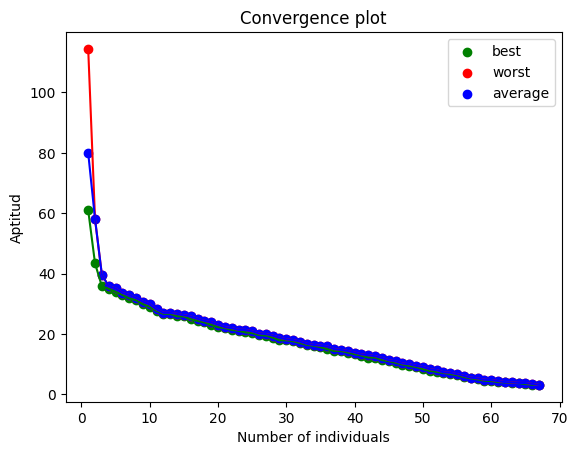

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(20, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although population = 50

Numer of iterations needed: 73

Global optimum approximation (best individual) is: [[0.04999999999999988, 0.0699999999999999, 0.010000000000000175, 0.019999999999999962, 0.020000000000000018, -0.02999999999999986, -0.010000000000000009, -0.11000000000000001, -0.1300000000000003, 0.01999999999999999], 0.03870000000000005]


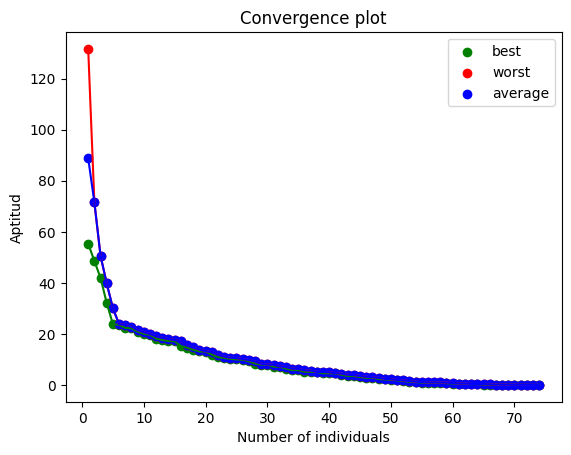

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(50, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although population = 100

Numer of iterations needed: 59

Global optimum approximation (best individual) is: [[-0.010000000000000175, -0.02999999999999986, 0.019999999999999962, 0.03000000000000022, -0.12, 5.551115123125783e-17, 0.04000000000000001, -0.02999999999999986, 5.551115123125783e-17, -0.010000000000000009], 0.019299999999999998]


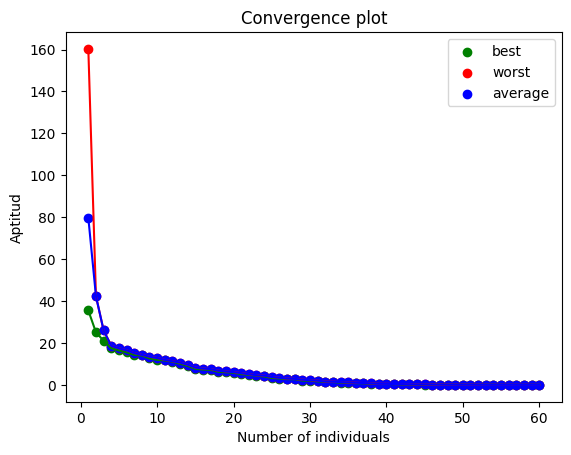

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### 1. Parabola.
#### Dimension = 10
#### Population = 20
#### Cut1 in index 3
#### Cut2 in index 7
#### Mutation percentage = 0.1
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 52

Global optimum approximation (best individual) is: [[-0.05000000000000002, -0.04000000000000045, -0.06000000000000047, 0.08000000000000004, 0.09000000000000002, 0.08000000000000004, 0.010000000000000009, -0.09999999999999992, -0.04000000000000001, 0.09000000000000005], 0.04840000000000011]


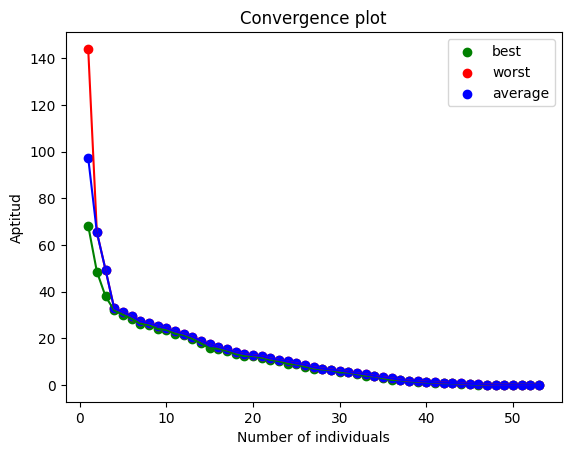

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(20, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.1, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although population = 50

Numer of iterations needed: 40

Global optimum approximation (best individual) is: [[-0.09000000000000002, 0.09000000000000002, -5.551115123125783e-17, 0.07000000000000003, 0.01999999999999999, 0.009999999999999842, 0.09000000000000005, -0.08999999999999991, -0.12, -0.04999999999999999], 0.05470000000000001]


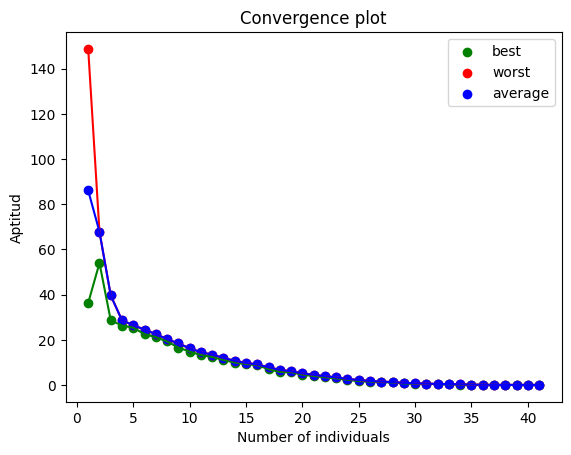

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(50, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.1, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although population = 100

Numer of iterations needed: 25

Global optimum approximation (best individual) is: [[-0.07, -0.05000000000000002, 0.060000000000000026, 0.09000000000000005, -0.03, -0.04999999999999988, -0.05999999999999989, 0.11, 0.07999999999999968, 0.02999999999999986], 0.04549999999999992]


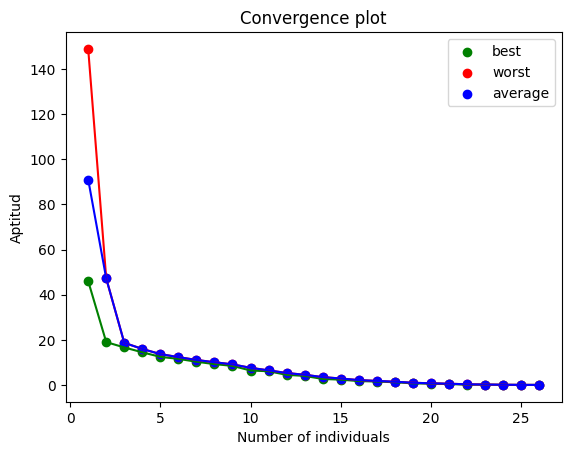

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.1, 0.001)
conv_plot(bests, worsts, avgs)

#### 1. Parabola.
#### Dimension = 10
#### Population = 20
#### Cut1 in index 3
#### Cut2 in index 7
#### Mutation percentage = 0.25
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 12866

Global optimum approximation (best individual) is: [[0.010000000000000064, -0.009999999999999842, 0.11000000000000007, -0.01999999999999985, -0.08000000000000004, -0.09999999999999992, -0.07999999999999993, 0.05999999999999969, 5.551115123125783e-17, 0.09000000000000005], 0.047199999999999964]


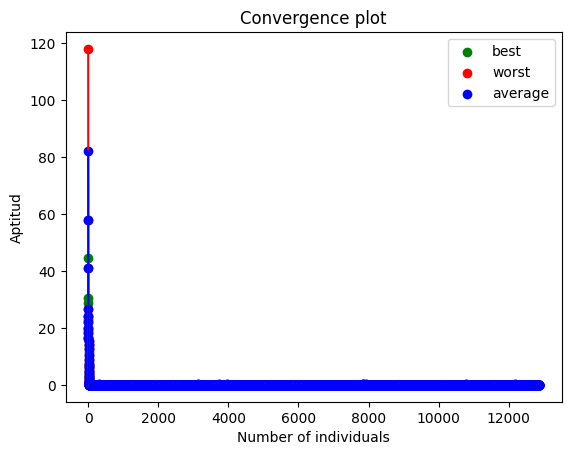

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(20, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.25, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although population = 50

Numer of iterations needed: 39

Global optimum approximation (best individual) is: [[0.10000000000000006, 0.10000000000000006, 0.04000000000000009, 0.03999999999999987, 0.11000000000000007, -0.11, -0.0699999999999999, 0.05000000000000002, 0.0, 0.10999999999999996], 0.06690000000000002]


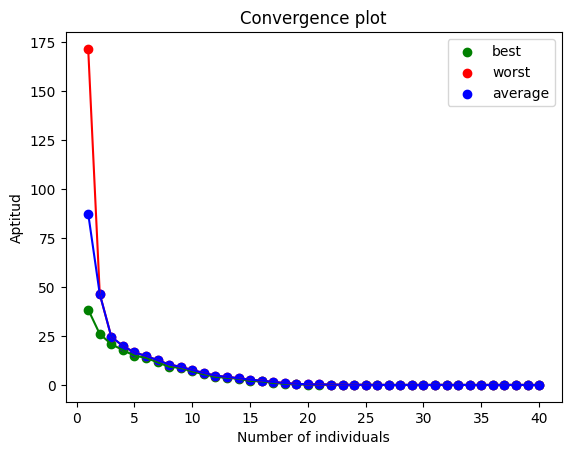

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(50, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.25, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although population = 100

Numer of iterations needed: 26

Global optimum approximation (best individual) is: [[0.03, -0.05000000000000002, -5.551115123125783e-17, -0.009999999999999953, -0.020000000000000212, 0.10000000000000006, -5.551115123125783e-17, -0.0699999999999999, -1.6653345369377348e-16, -0.02999999999999986], 0.0197]


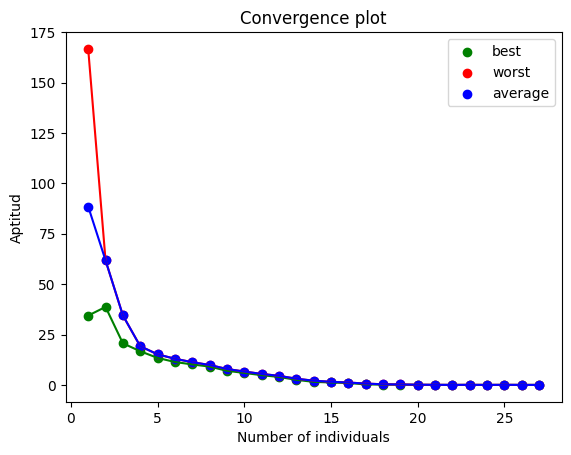

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-5.12, 5.12], 10, parabola, TwoCrossover, 3, 7, 0.23, 0.25, 0.001)
conv_plot(bests, worsts, avgs)

#### 1. Parabola.
#### Dimension = 10
#### Population = 20
#### Cross operator = Uniform cross operator
#### Cross percentage = 0.5
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 16

Global optimum approximation (best individual) is: [[-0.07, 0.16, -0.33000000000000007, 3.2800000000000002, -1.23, 3.9499999999999997, -1.19, 0.76, 0.26, -1.21], 31.538599999999995]


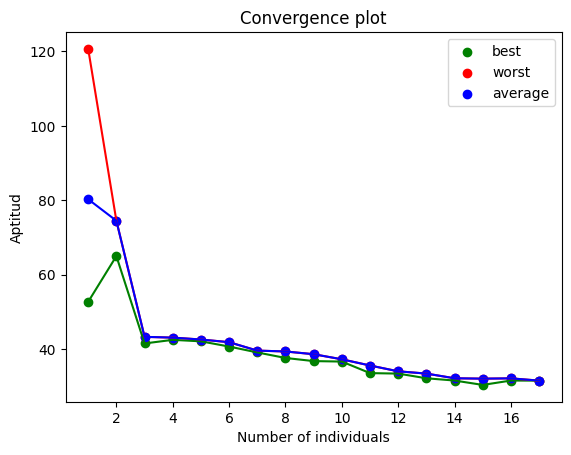

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(20, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.5, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although cross percentage = 0.7

Numer of iterations needed: 8

Global optimum approximation (best individual) is: [[1.12, 0.5800000000000001, 1.33, -1.02, -0.34, 1.17, -1.7999999999999998, 1.22, -0.6, -3.81], 25.4891]


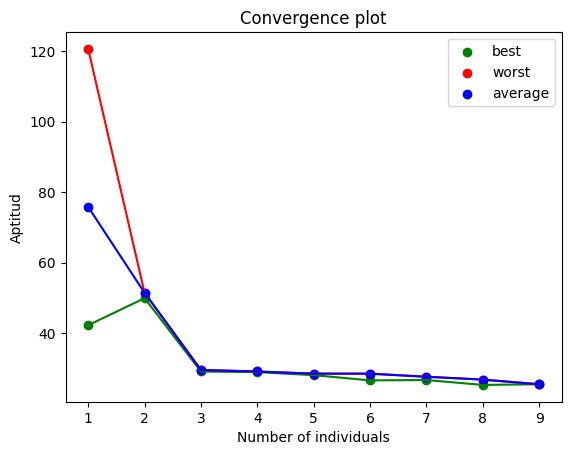

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(20, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although cross percentage = 0.9

Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[-0.04, 1.31, -1.14, 0.17, 3.08, 3.26, -0.17, -0.12, -1.09, -3.57], 37.1365]


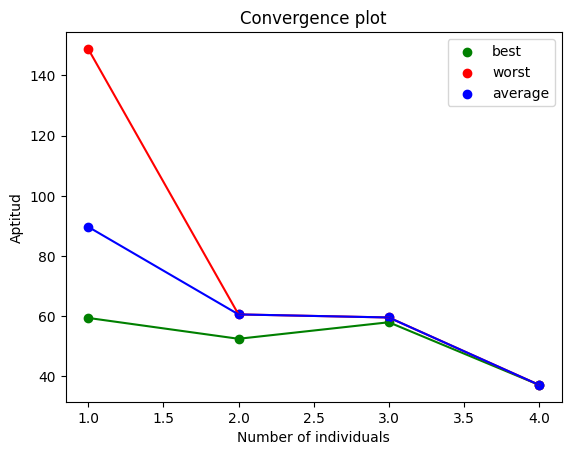

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(20, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.9, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### 1. Parabola.
#### Dimension = 10
#### Population = 50
#### Cross operator = Uniform cross operator
#### Cross percentage = 0.5
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 38

Global optimum approximation (best individual) is: [[-0.019999999999999962, 0.08999999999999991, -0.07000000000000003, 0.020000000000000018, -0.05999999999999989, -0.07000000000000003, 0.01999999999999999, -0.07000000000000003, 0.08000000000000004, -0.04000000000000001], 0.03559999999999999]


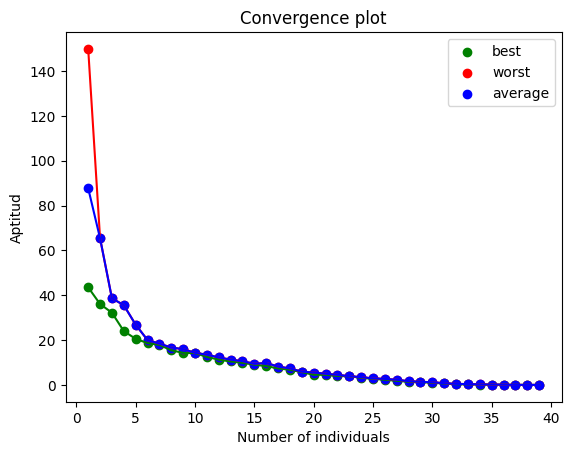

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(50, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.5, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although cross percentage = 0.7

Numer of iterations needed: 7

Global optimum approximation (best individual) is: [[-0.52, -1.61, 1.9700000000000002, -0.29, -0.1, -1.61, 2.79, -1.63, -0.96, -1.33], 22.561100000000003]


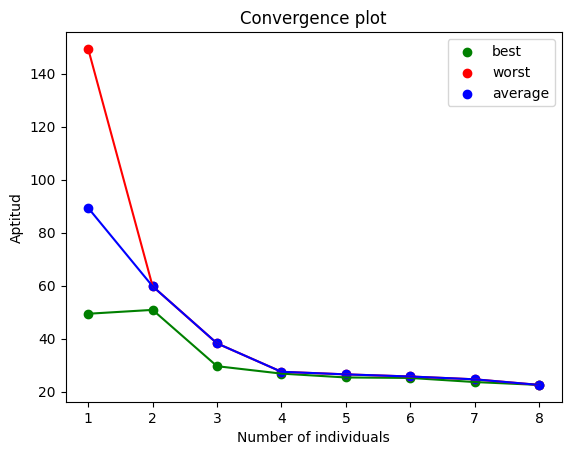

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(50, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although cross percentage = 0.9

Numer of iterations needed: 12

Global optimum approximation (best individual) is: [[-0.73, 0.12999999999999998, 0.30000000000000004, -1.16, -1.21, -3.07, 1.3900000000000001, -0.35, -0.8600000000000001, 1.07], 16.813499999999998]


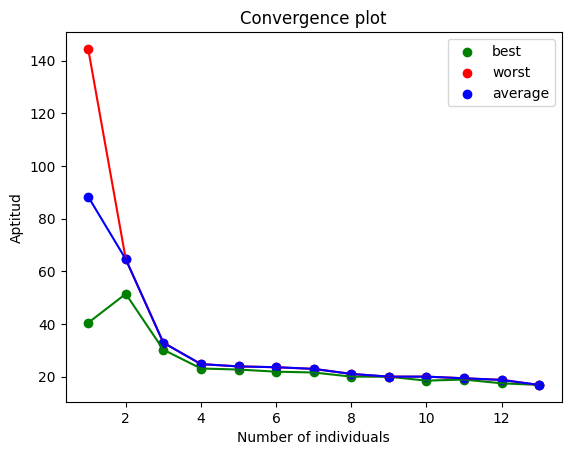

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(50, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.9, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### 1. Parabola.
#### Dimension = 10
#### Population = 100
#### Cross operator = Uniform cross operator
#### Cross percentage = 0.5
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 49

Global optimum approximation (best individual) is: [[-0.029999999999999888, 0.009999999999999842, -0.11000000000000007, 0.060000000000000026, -0.03, -0.09000000000000005, -0.12999999999999942, -0.019999999999999962, 0.020000000000000073, -0.04000000000000001], 0.04499999999999987]


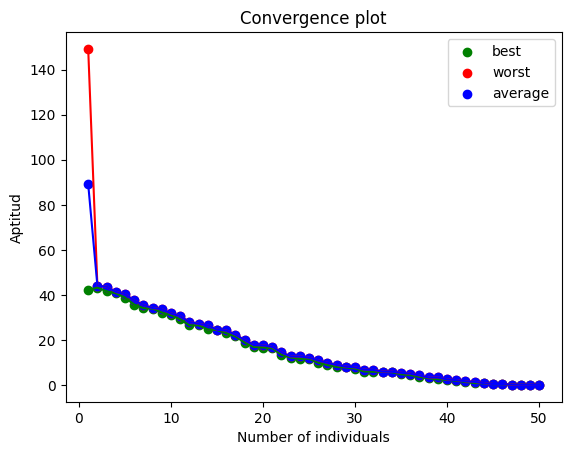

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.5, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although cross percentage = 0.7

Numer of iterations needed: 50

Global optimum approximation (best individual) is: [[0.08000000000000004, -0.03, 0.0699999999999999, -0.030000000000000027, 0.11999999999999972, 0.11000000000000029, 0.04999999999999988, -0.10999999999999993, -0.019999999999999962, 0.060000000000000026], 0.05819999999999997]


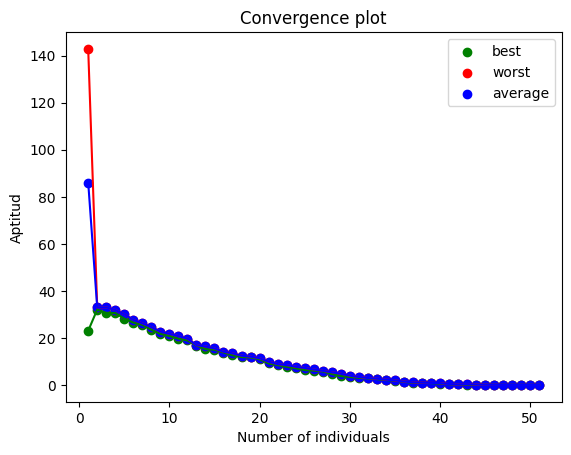

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### Same as above, although cross percentage = 0.9

Numer of iterations needed: 32

Global optimum approximation (best individual) is: [[-0.060000000000000026, 0.10000000000000003, 0.059999999999999665, -0.05000000000000002, -0.0799999999999999, 0.02999999999999986, -0.09000000000000005, 0.17, 0.10000000000000003, -0.08000000000000004], 0.08039999999999997]


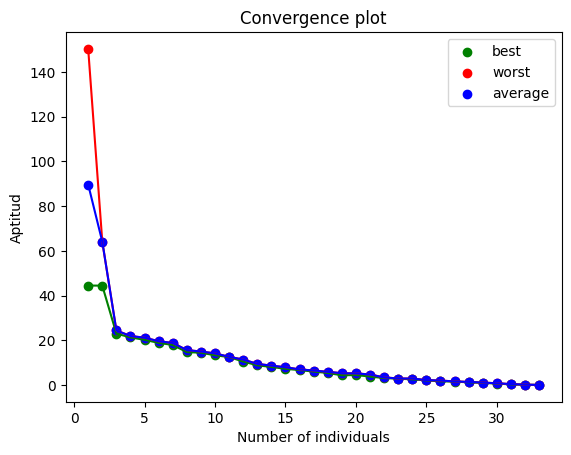

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-5.12, 5.12], 10, parabola, UniformCrossover, 7, 0.9, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

## Rosenbrock test

#### 2. Rosenbrock.
#### Dimension = 10
#### Population = 20
#### Cut1 in index 3
#### Cut2 in index 7
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 30

Global optimum approximation (best individual) is: [[0.63, 0.48, 0.14, -0.009999999999999953, 0.019999999999999962, 0.01999999999999999, 0.08000000000000004, 0.10000000000000006, -0.09000000000000002, 0.10000000000000006], 11.959983000000001]


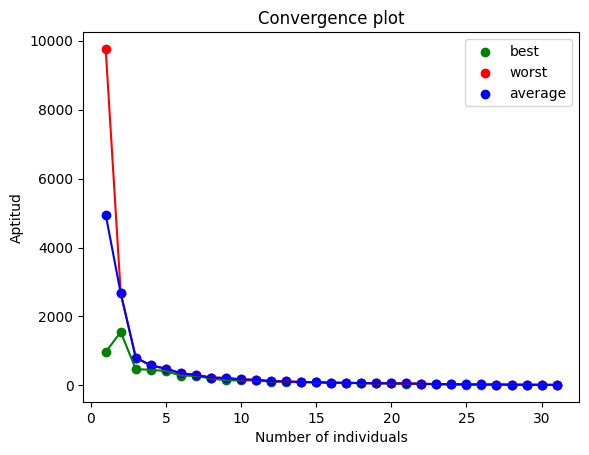

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-2.048, 2.048], 10, rosenbrock, TwoCrossover, 3, 7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### 2. Rosenbrock.
#### Dimension = 10
#### Population = 100
#### Cross over opertor
#### Cross avg = 0.1 
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 20

Global optimum approximation (best individual) is: [[-0.98, 0.86, 0.79, 0.8900000000000001, 1.05, 1.03, 0.8400000000000001, 0.6200000000000001, 0.35, 0.27], 28.007656999999988]


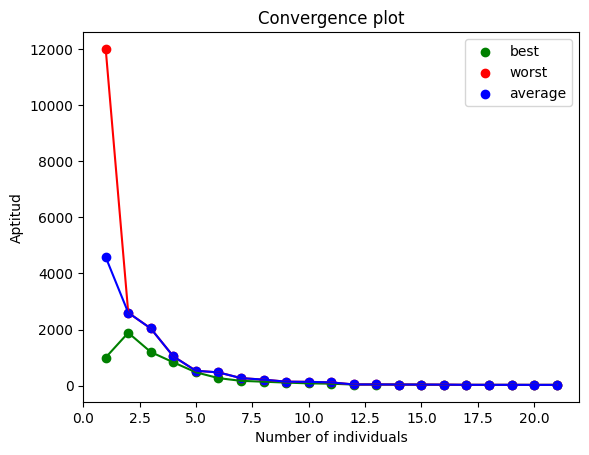

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-2.048, 2.048], 10, rosenbrock, UniformCrossover, 7, 0.1, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

## Ackley test

#### 3. Ackley.
#### Dimension = 10
#### Population = 20
#### Cut1 in index 3
#### Cut2 in index 7
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 7

Global optimum approximation (best individual) is: [[-1.06, -0.8900000000000001, 0.94, 0.94, -2.048, 0.05, -2.048, -1.0, 1.02, 0.97], -12021.383180772213]


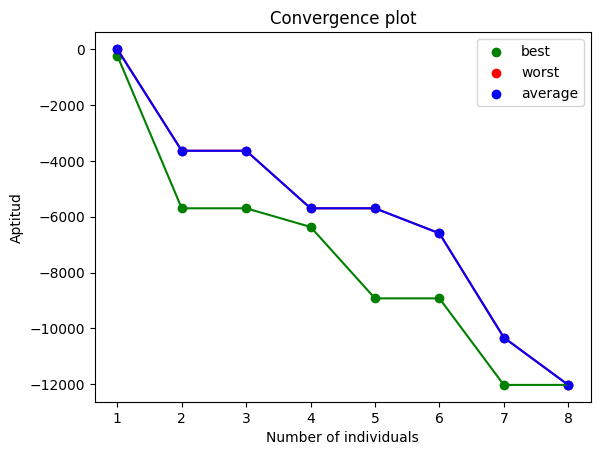

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-2.048, 2.048], 10, ackley, TwoCrossover, 3, 7, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

#### 3. Ackley.
#### Dimension = 10
#### Population = 100
#### Cross over opertor
#### Cross avg = 0.1 
#### Mutation percentage = 0.01
#### Delta = 0.23
#### $\epsilon$ = 0.001 

Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[0.06, -0.05, 1.97, -0.94, -0.09, 0.91, 2.048, -1.11, -2.0100000000000002, 2.03], -9764.128059205348]


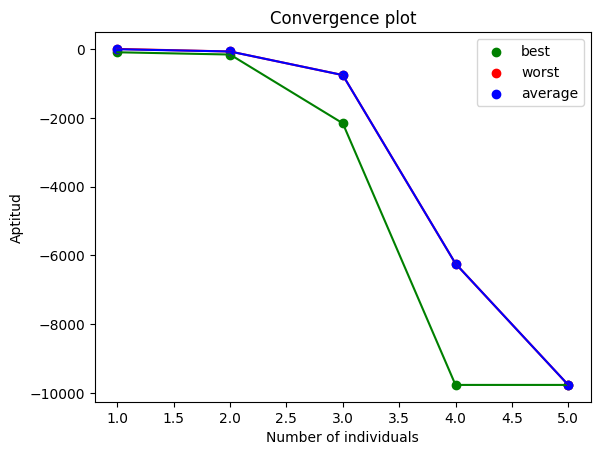

In [ ]:
best, bests, worsts, avgs, iteration = genetic_algo(100, 2, [-2.048, 2.048], 10, ackley, UniformCrossover, 7, 0.1, 0.23, 0.01, 0.001)
conv_plot(bests, worsts, avgs)

### 1. ¿Cual fue la versión de algoritmo genético que convergió (en promedio) más rápido a la solución optima conocida?

El algoritmo que hace uso del operador de cruza con 2 genes.

###2. ¿Cuál es el tipo de cruza que obtuvo mejores resultados? ¿Por qué?

El operador de 2 cortes, porque toma en consideración cambios en dos genes aleatorios, mientras que el de cruza uniforme puede alterar más genes (o menos) de acuerdo cierta probabilidad. 

###3. ¿Que tamaño de población obtuvo mejores resultados? 

La de 100 individuos.

###4.¿Cual de los parámetros configurados en el algoritmo genético considera que es más sensible en el proceso de búsqueda? (puede ser un parámetro numérico, categórico o ambos). 

Los operadores de cruza, así como también la representación que se esté considerando, pues en estos problemas, la representación binaria causa más problemas que beneficio (en términos de costo computacional), y también de cómo los cromosomas se tienen que reparar en caso de que las variables se salgan de los intervalor permitidos.

###5. Considera importante realizar pruebas con otros valores de parametros, si o no y ¿por qué?. Si su respuesta es afirmativa, ¿como diseñaría las pruebas de estos experimentos?

Sí, para poder comparar los resultados que se tengan entre diversas versiones del algoritmo genético. Como se propuso en la práctica creo que está bien el diseño. Esto es, con una misma semilla y con un cierto número de réplicas por cada implementación en específico del algoritmo, para poder comparar resultados.

###6. Agregue conclusiones generales en su reporte.

Me pareció muy interesante esta práctica, y me sorprendió como en estos ejemplos de funciones en variables reales, el algoritmo encuentra aproximaciones a soluciones en un tiempo razonable, y por medio de inspirarse en reproducción entre individuos y selección natural.

